In [99]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from pprint import pprint
from pandas import json_normalize


In [15]:
ageSexDF = pd.read_csv("resources/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
ageSexDF_original = ageSexDF
ageSexDF.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,10/20/2021,01/01/2020,10/16/2021,By Total,NaN,NaN,United States,All Sexes,All Ages,723880.0,5928410.0,649389.0,369136.0,9372.0,1012160.0,NaN
1,10/20/2021,01/01/2020,10/16/2021,By Total,NaN,NaN,United States,All Sexes,Under 1 year,132.0,33432.0,367.0,16.0,23.0,506.0,NaN
2,10/20/2021,01/01/2020,10/16/2021,By Total,NaN,NaN,United States,All Sexes,0-17 years,542.0,59268.0,1043.0,138.0,189.0,1636.0,NaN
3,10/20/2021,01/01/2020,10/16/2021,By Total,NaN,NaN,United States,All Sexes,1-4 years,63.0,6236.0,210.0,16.0,65.0,322.0,NaN
4,10/20/2021,01/01/2020,10/16/2021,By Total,NaN,NaN,United States,All Sexes,5-14 years,172.0,9911.0,303.0,54.0,80.0,501.0,NaN


In [16]:
# cleanup tasks
# 1. get rid of "all age" and "all sex" rows because these are just combined from the different age groups and sexes
# 2. get rid of "by total" and "by year" - just added up from "by month"
# 3. get rid of "United States" - just added up from the individual states
filter1 = ageSexDF['Sex']!='All Sexes'
filter2 = ageSexDF['Age Group']!='All Ages'
filter3 = ageSexDF['Group']=='By Month'
#filter4 = ageSexDF['State']!='United States'
ageSexDF = ageSexDF.loc[filter1 & filter2 & filter3]

# 4. figure out the age groups - there is overlap
filter5 = ((ageSexDF['Age Group'] == '0-17 years') | 
           (ageSexDF['Age Group'] == '18-29 years') |
           (ageSexDF['Age Group'] == '30-39 years') |
           (ageSexDF['Age Group'] == '40-49 years') |
           (ageSexDF['Age Group'] == '50-64 years') |
           (ageSexDF['Age Group'] == '65-74 years') |
           (ageSexDF['Age Group'] == '75-84 years') |
           (ageSexDF['Age Group'] == '85 years and over'))
ageSexDF = ageSexDF.loc[filter5]

# 5. get rid of "Pneumonia.... or COVID-19 Deaths" and "Footnote" columns - they are added up as well from the covid, pneumonia death information
ageSexDF = ageSexDF.drop('Pneumonia, Influenza, or COVID-19 Deaths', axis = 1)
ageSexDF = ageSexDF.drop('Footnote', axis = 1)

ageSexDF.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths
8281,10/20/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,0-17 years,0.0,1666.0,50.0,0.0,36.0
8285,10/20/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,18-29 years,0.0,3218.0,75.0,0.0,26.0
8287,10/20/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,30-39 years,0.0,4300.0,138.0,0.0,49.0
8289,10/20/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,40-49 years,0.0,6087.0,261.0,0.0,83.0
8291,10/20/2021,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,Male,50-64 years,1.0,26094.0,1429.0,0.0,281.0


The maximum deaths by COVID-19 seemed to occur in the group of 85 years and over :Total COVID-19 Deaths    196633.0
dtype: float64


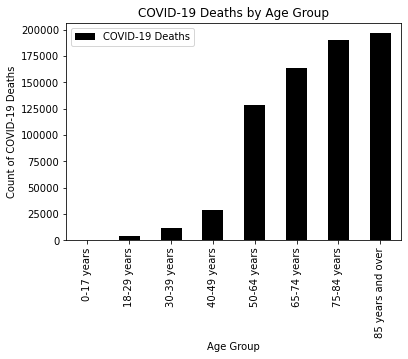

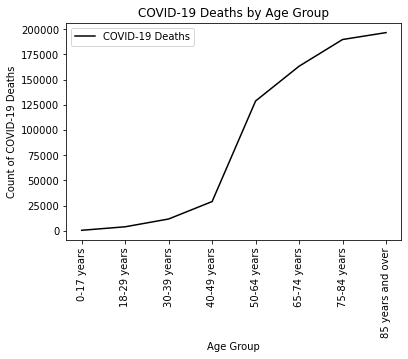

In [70]:
# once we get around 5 visualizations, we should stop - advice from Dr. A

# What age group is most susceptible and what are the differences among the age groups? - prashanth to break down into tasks
# bar chart showing each group
# it might make sense to make bigger age ranges for this...
#Clean the data by populating all the NaN values to 0 - TODO

#Filter the dataframe to get the vrecords by "UNited "
deaths_in_US_df = ageSexDF.loc[ageSexDF["State"] == "United States"]

# Prep the data - create a dataframe for just the age groups. Combine both male and female by age group OR Create - 
deaths_by_age_group_df = pd.DataFrame(deaths_in_US_df.groupby("Age Group").sum() ["COVID-19 Deaths"])

# Plot -  a bar chart (Age range vs. Covid Death Count) and/or a Line chart
deaths_by_age_group_df.plot(kind="bar", color="black")
plt.ylabel("Count of COVID-19 Deaths")
plt.title("COVID-19 Deaths by Age Group") 

plt.savefig("Charts/covid_19_deaths_by_age_group_bar.png")

deaths_by_age_group_df.plot(kind="line", color="black")
plt.ylabel("Count of COVID-19 Deaths")
plt.title("COVID-19 Deaths by Age Group")
plt.xticks(rotation="90")
plt.savefig("Charts/covid_19_deaths_by_age_group_line.png")


# Analyze and summarize the findings
print(f"The maximum deaths by COVID-19 seemed to occur in the group of 85 years and over :Total {deaths_by_age_group_df.max()}")
    



In [118]:
# Is geographic location a factor in the number of deaths? - prashanth to break down into tasks
# Probably need to get the state populations for this. - an api call to fill out the data frame
# Could do a heat map for this one!

# Tasks:
# Research and find the api to get the population information by State 

census_api_url = "https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&SEX=1,2&for=state:*"
response = requests.get(census_api_url).json()
census_df = pd.DataFrame(response)


#census_df.to_excel("Output_data/census.xlsx")
census_df.columns = census_df.iloc[0]
census_df = census_df[1:]

#Replace the values in the Sex column 
census_df["SEX"].replace({"1":"Male", "2": "Female"}, inplace=True)

#Rename Sex to Gender and state to StateID of the columns
census_df.rename(columns={"NAME": "State", "POP": "Population", "SEX": "Gender", "state": "State ID"}, inplace=True)

#Save the census data in the output folder
census_df.to_excel("Output_data/census.xlsx", index=False, sheet_name="Census Data")
census_df.tail()



# Write the code to get the state population - prashanth
# Create a dataframe by State and Covid-19 deaths - prashanth
# Add the State population to the state dataframe - prashanth
# Create statistics by state - prashanth
# Plot a heat map using google maps  - use number of deaths as weight - prashanth
#      Will need to call an API to get the lat and long for each state - prashanth
# Analyze and summarize the findings # latlong.net - can help with the heat map - prashanth


,State,Population,Gender,State ID
100,Massachusetts,3546935,Female,25
101,Michigan,4918528,Male,26
102,Michigan,5068329,Female,26
103,Minnesota,2809811,Male,27
104,Minnesota,2829821,Female,27


In [ ]:
# What effect does sex have on covid mortality?
# more male vs females?
# might need state population data males and females for this one

# Tasks:
# Create a dataframe for covid-19 death count by gender and state - Yang
# Call to an API to get the state population by gender - Yang
# Add the population information to the dataframe - Yang
# Create necessary stats - mainly percentage by gender and state
# Plot a pie chart to show the percentages of death by gender  - overall - Hannah
# Draw a line chart to show the percntage by state (for all the 50 states) - (Can also be a bar chart) - Hannah
# Analyze and summarize the findings -  Determine if there is a trend - Hannah


In [ ]:
# Time - what period was the peak of covid mortality? - prashanth to break down into tasks
# How many waves were there?

# Tasks:
# Create a dataframe for covid-19 death count by months - Randy
# Draw a line chart (Year-Monnth Vs. Covid-19 Death count) - Randy
# Analyze and summarize the findings -  Determine the peaks in the death count by examining the line chart - Randy
